In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')

# Problem Statement
Forecast the airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting


In [2]:
df = pd.read_excel("E:\Data Science\Assignments\Forecasting\Airlines+Data.xlsx")

In [3]:
df.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
df.duplicated().sum()

0

<Axes: >

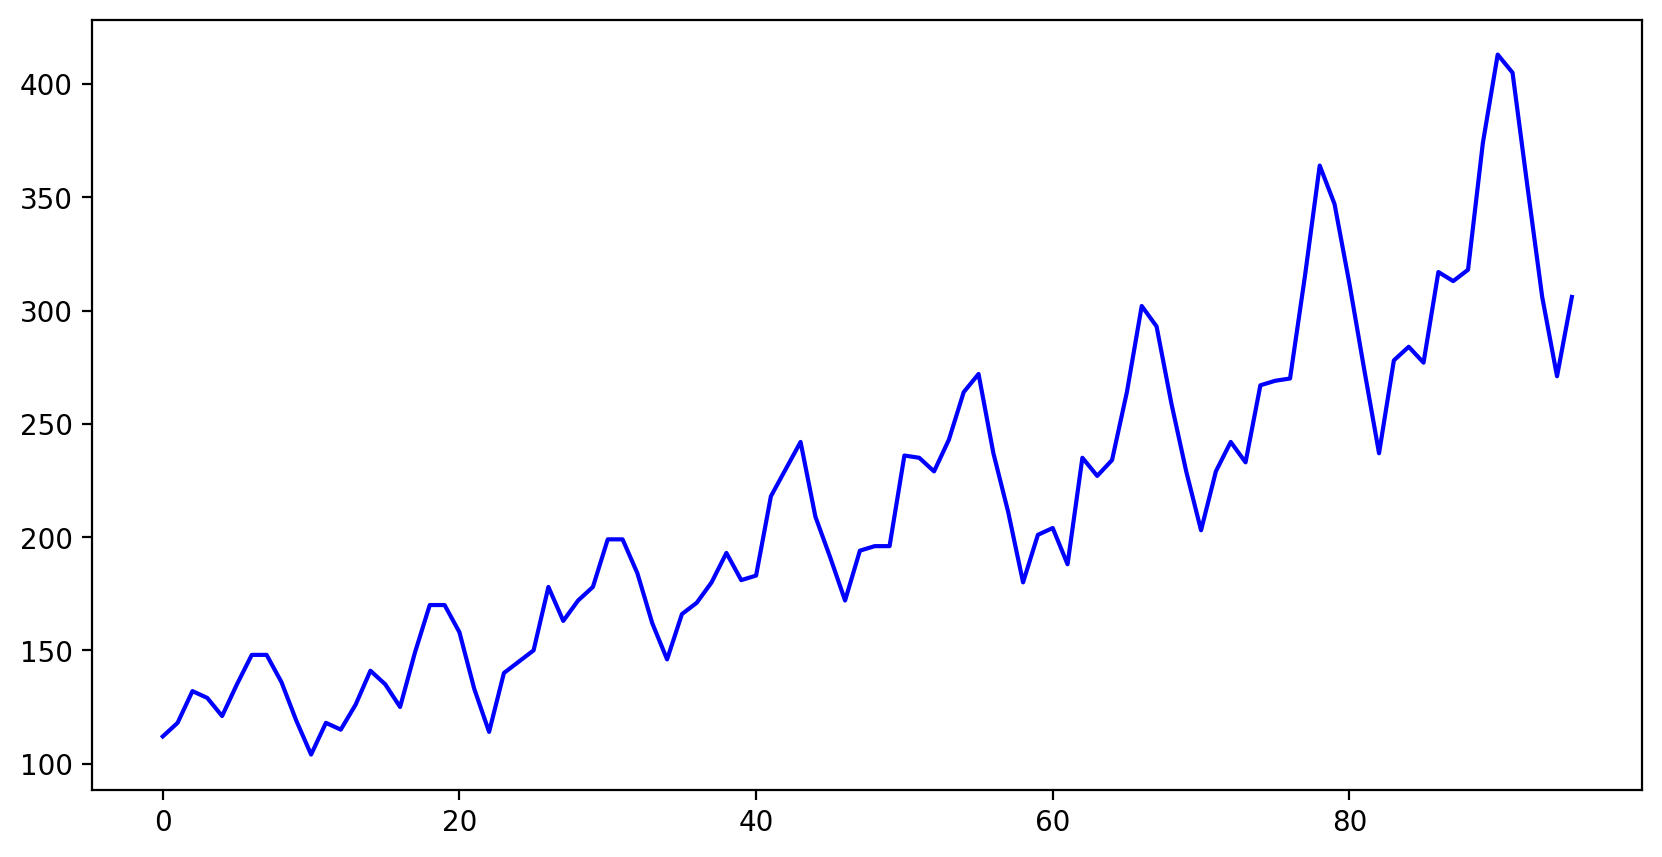

In [6]:
df.Passengers.plot(color='blue')

<Axes: ylabel='Density'>

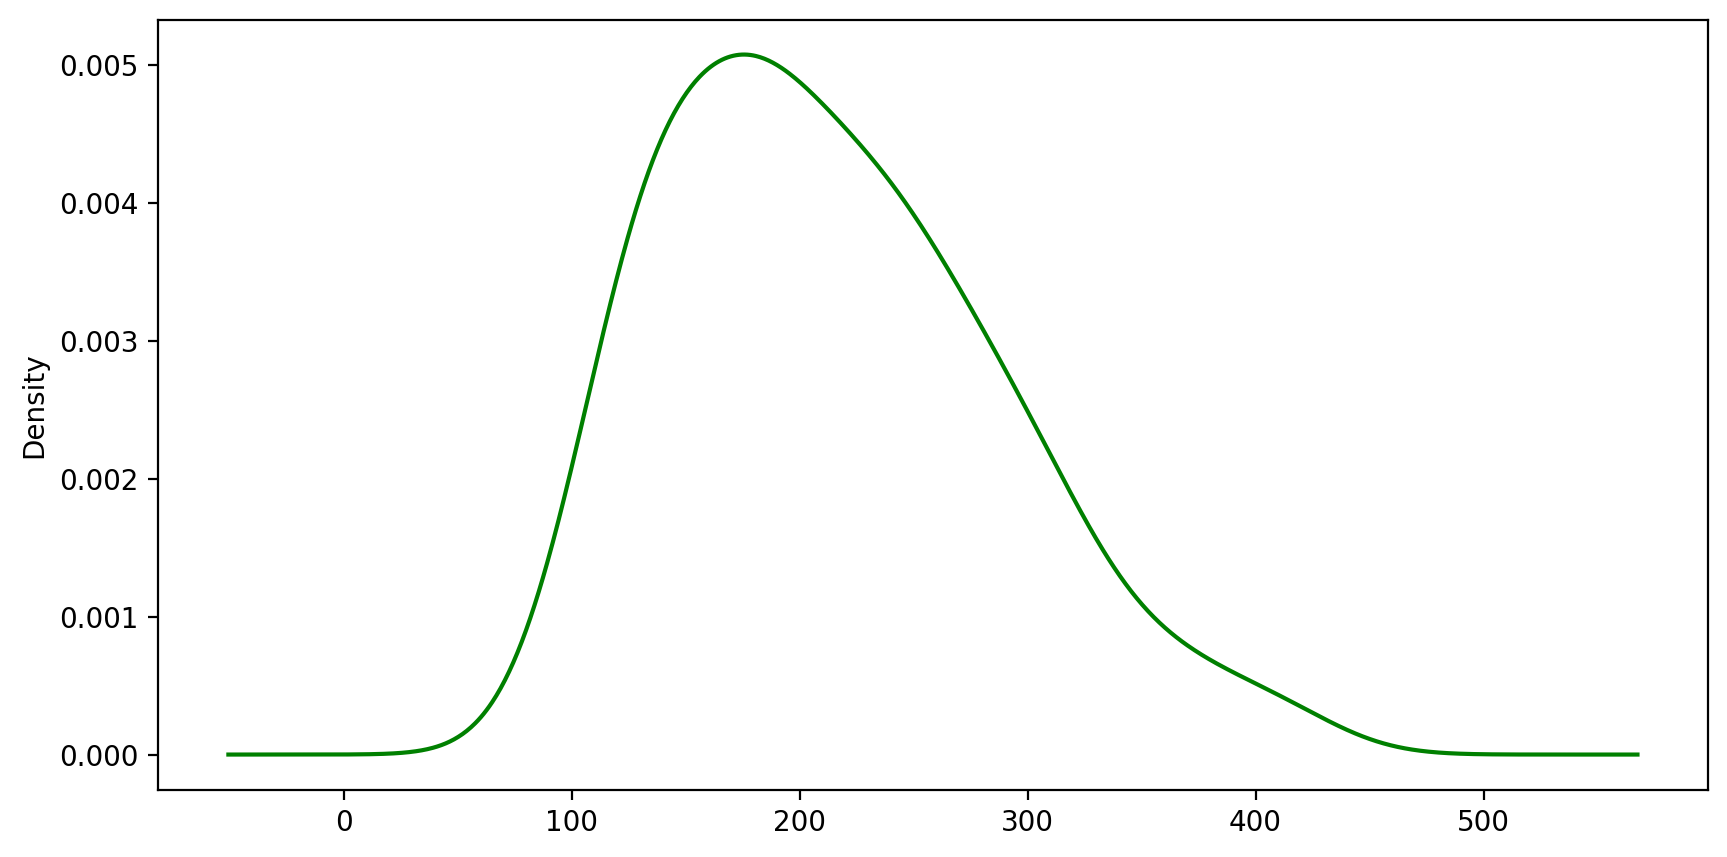

In [7]:
df.Passengers.plot(kind='kde',color='green')

<Axes: ylabel='Frequency'>

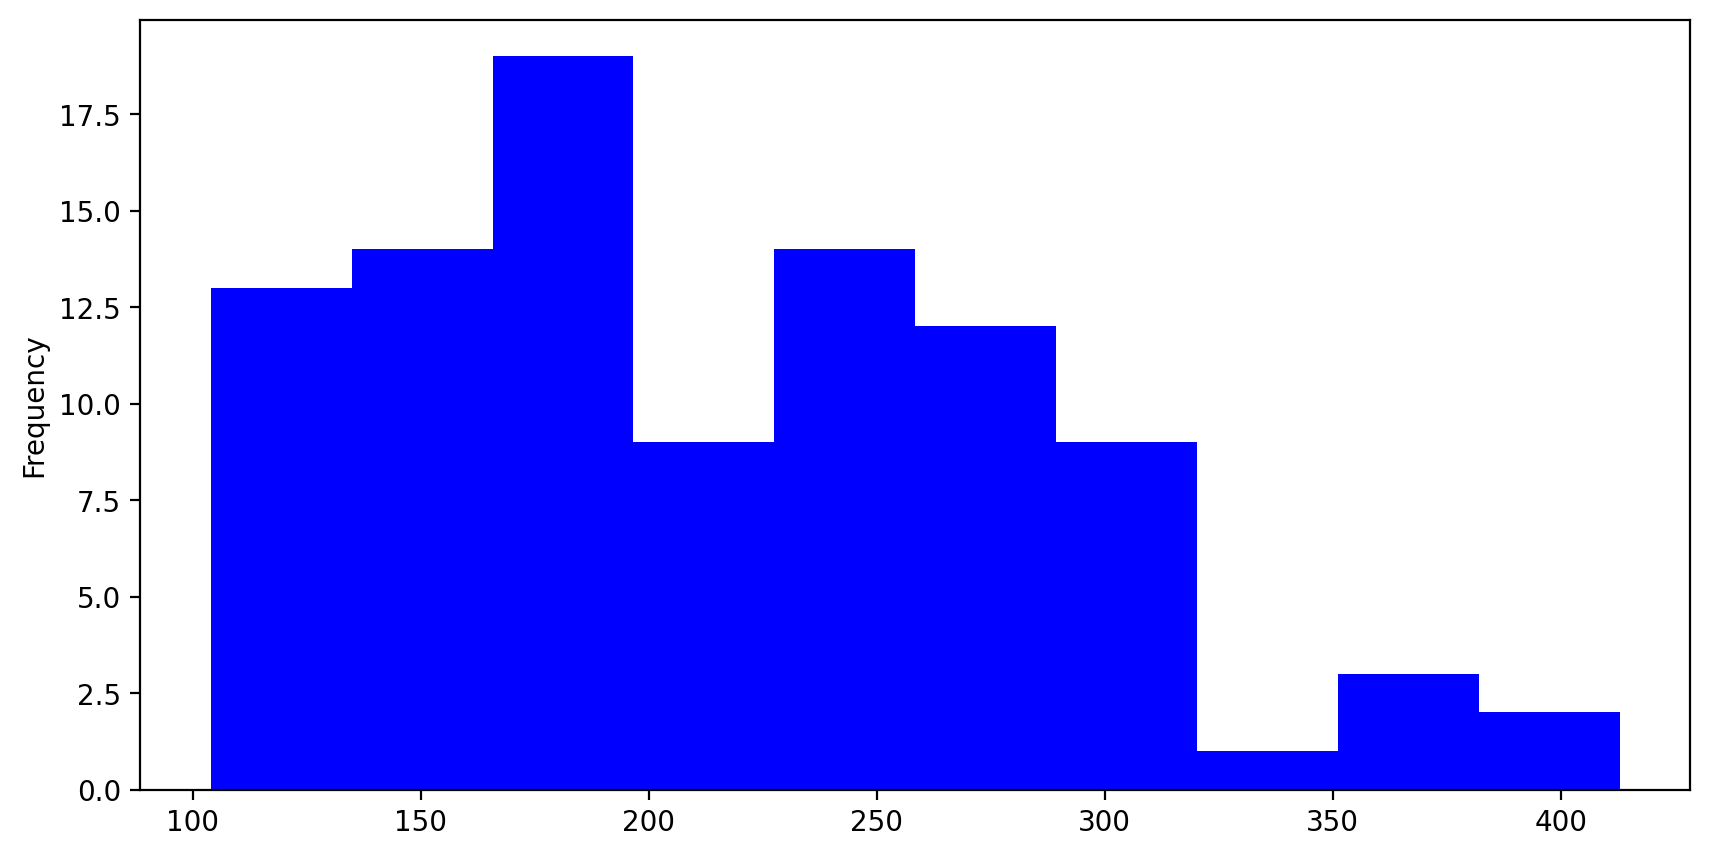

In [8]:
df.Passengers.plot(kind='hist',color='blue')

In [9]:
temporary=pd.read_excel("E:\Data Science\Assignments\Forecasting\Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True,squeeze=True)

# Checking outliers by plotting Boxplot

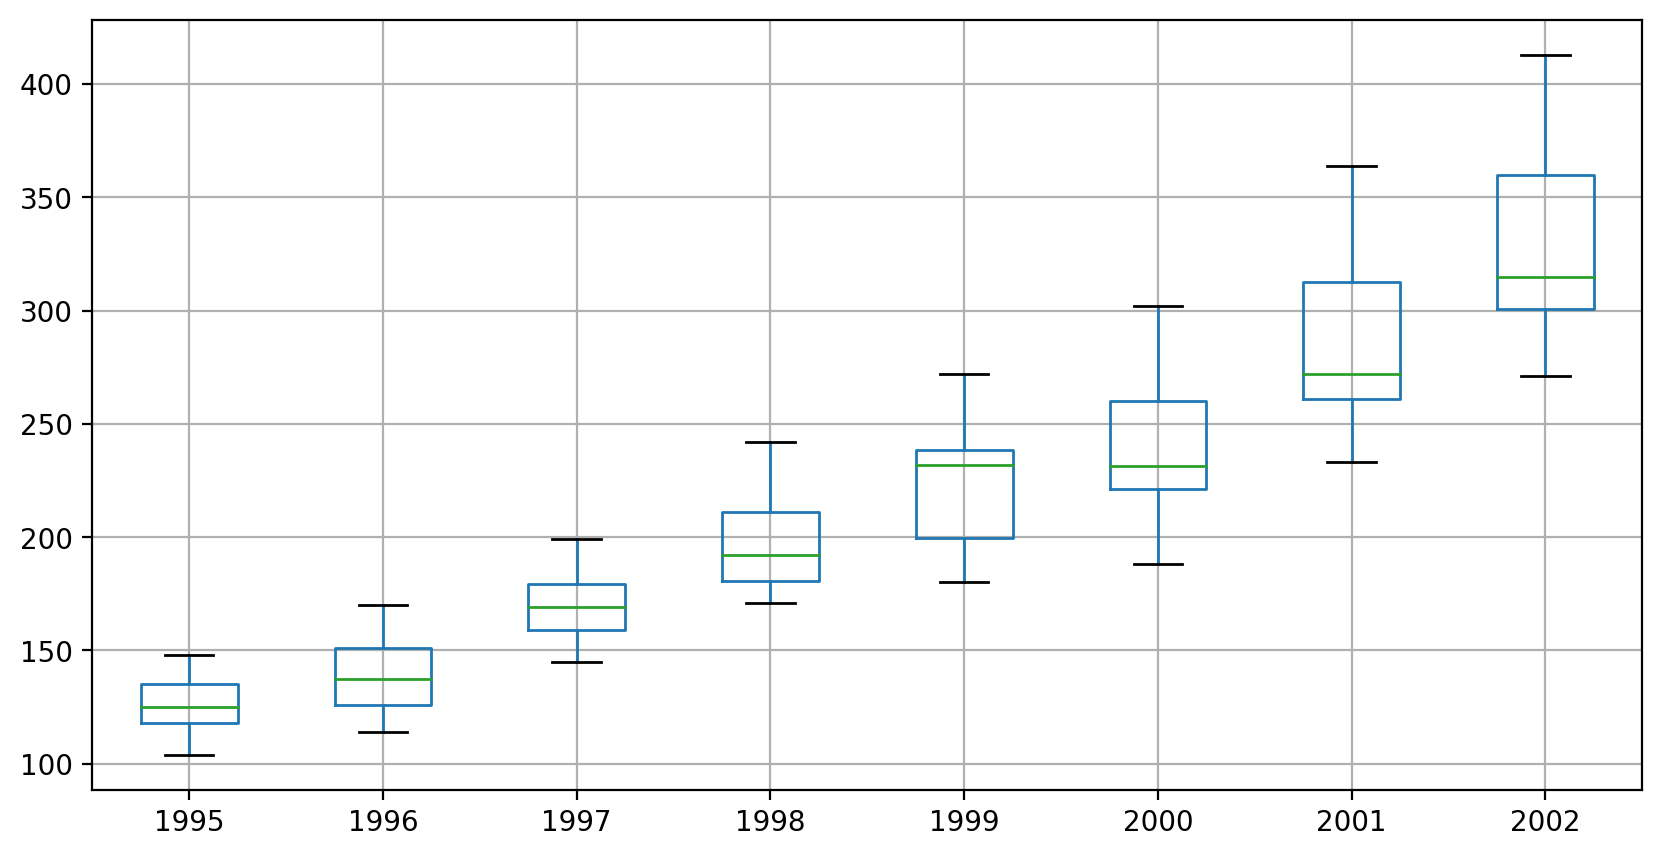

In [10]:
group=temporary.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

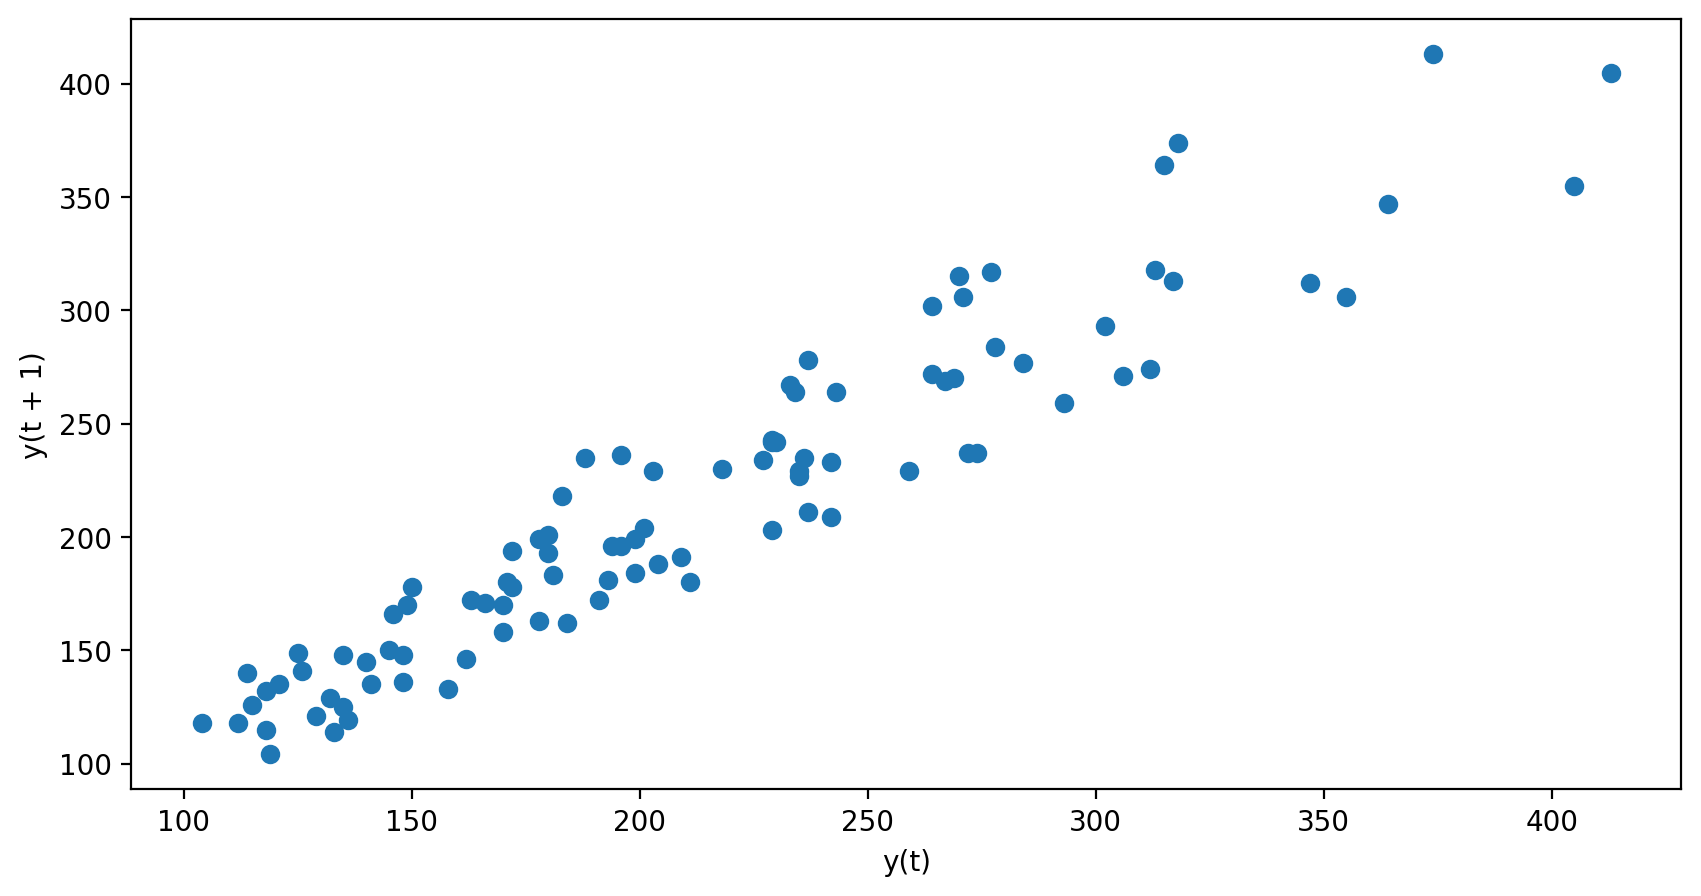

In [11]:
lag_plot(temporary)

In [12]:
# SPLITTING THE DATASET FOR TRAIN (80%) AND TEST(20%)
train = df.head(77)
test = df.tail(19)

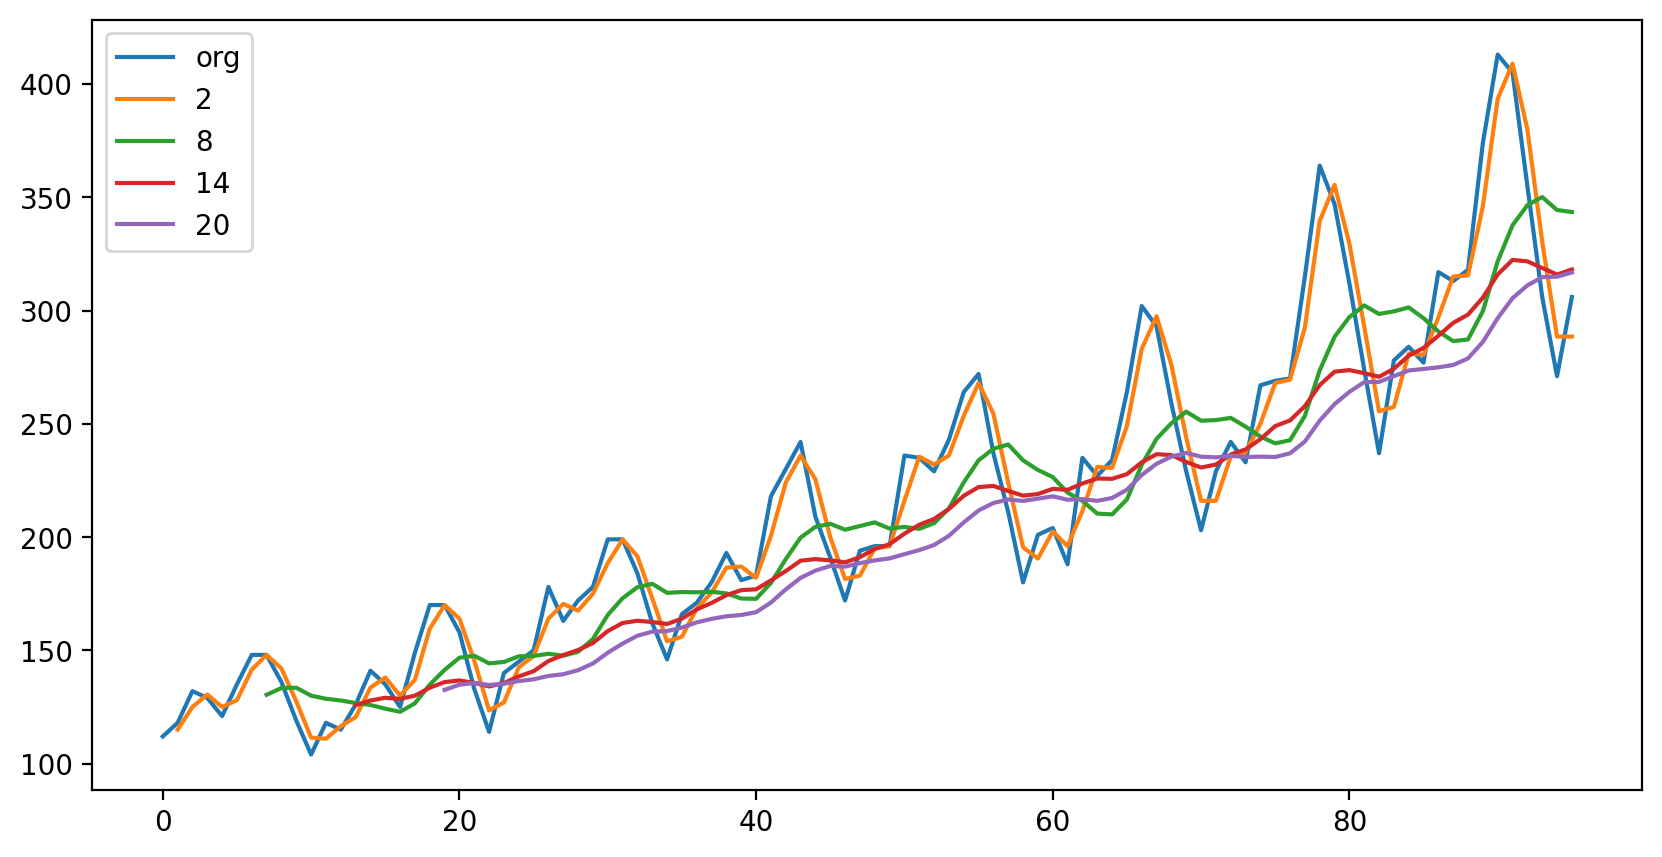

In [13]:
df.Passengers.plot(label="org")
for i in range(2,24,6):
   df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

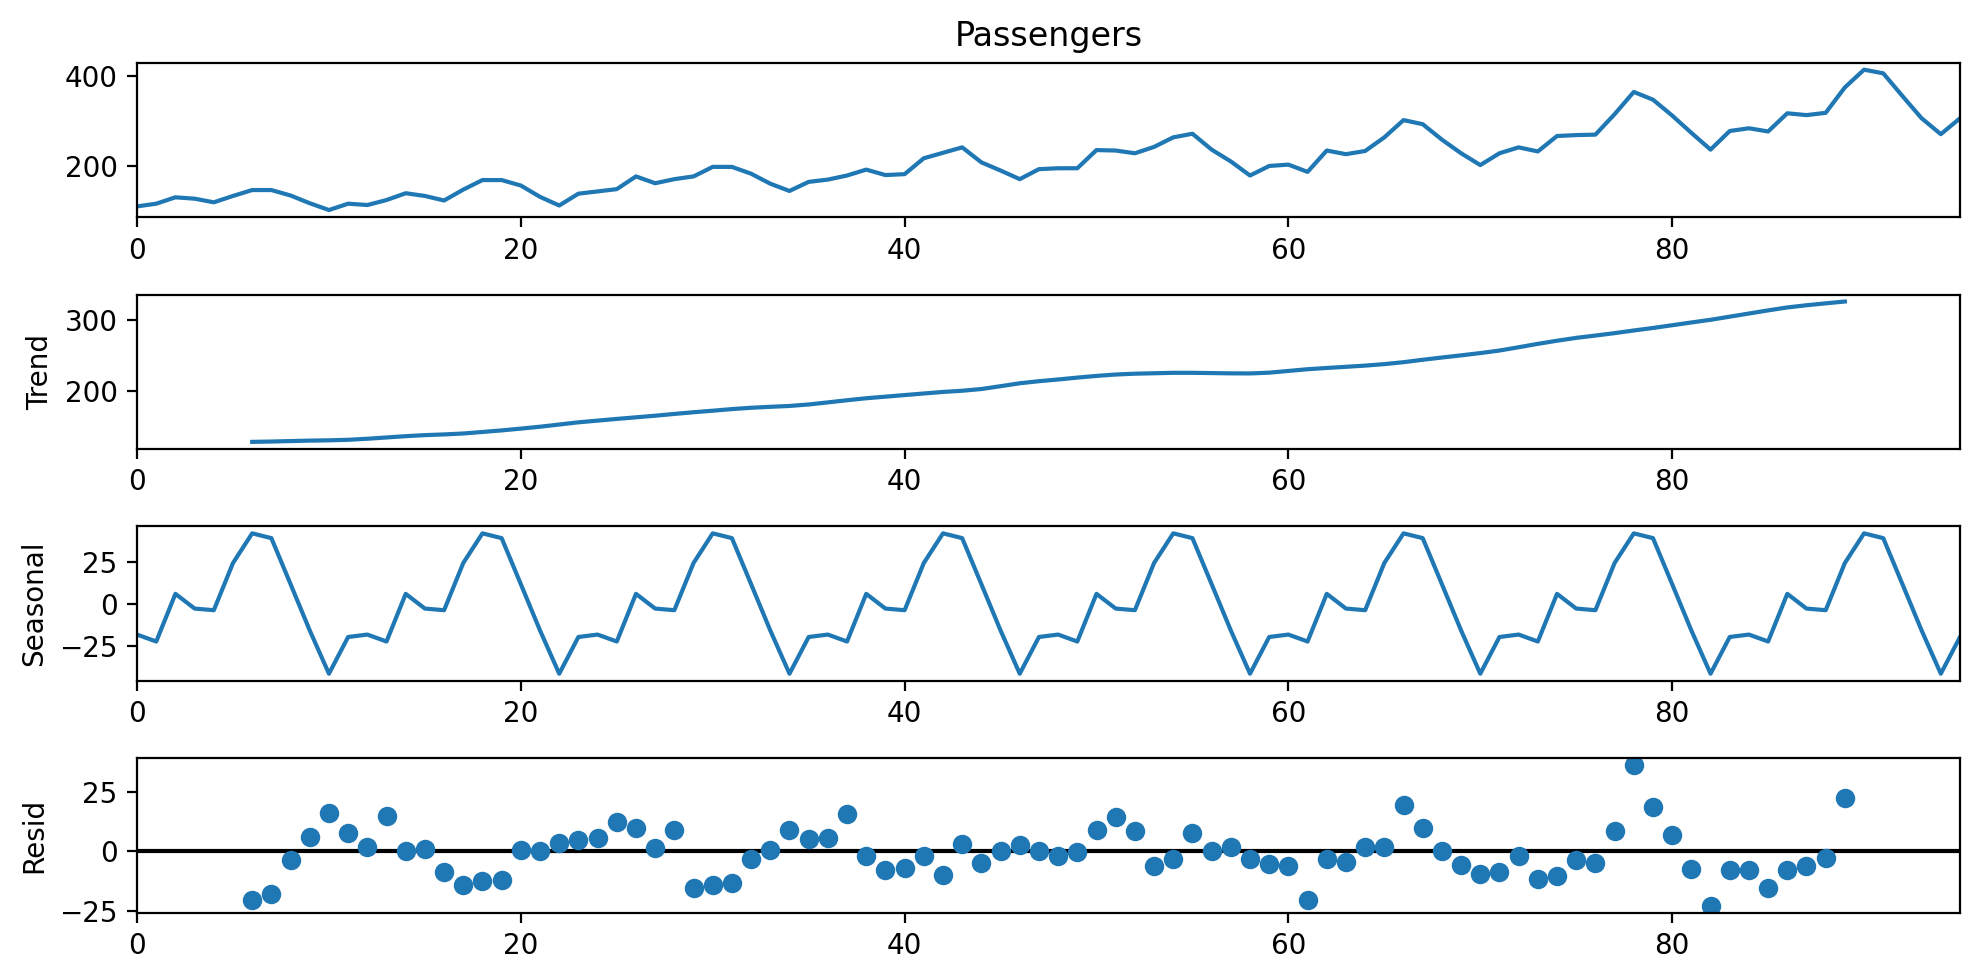

In [14]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

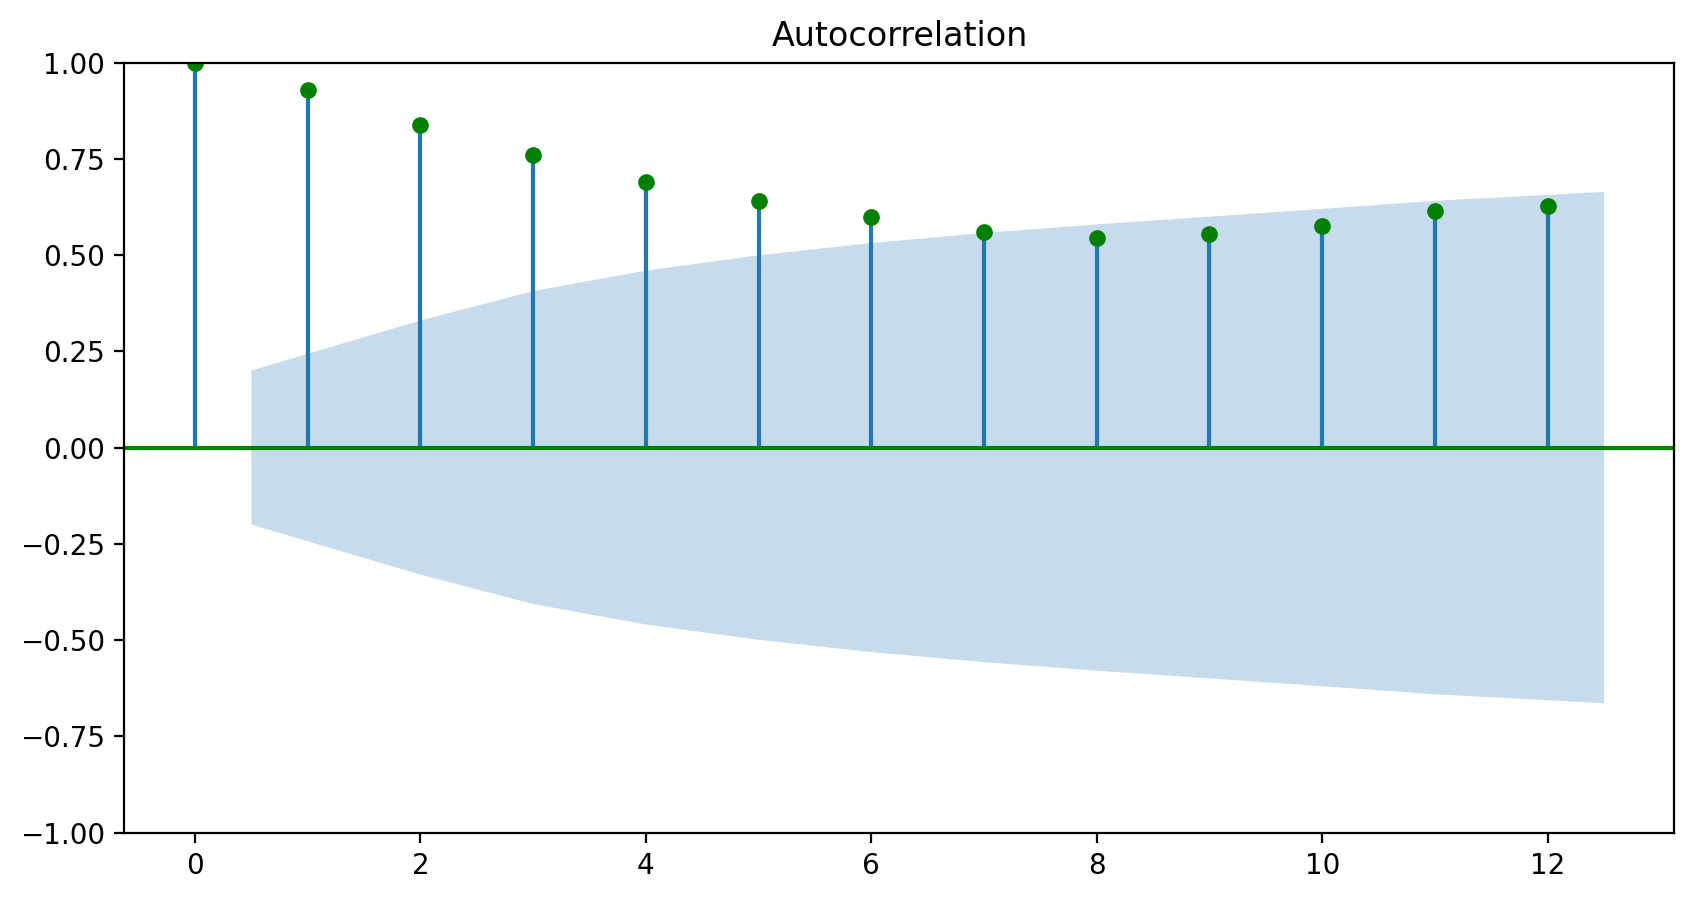

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12,color='green')
plt.show()


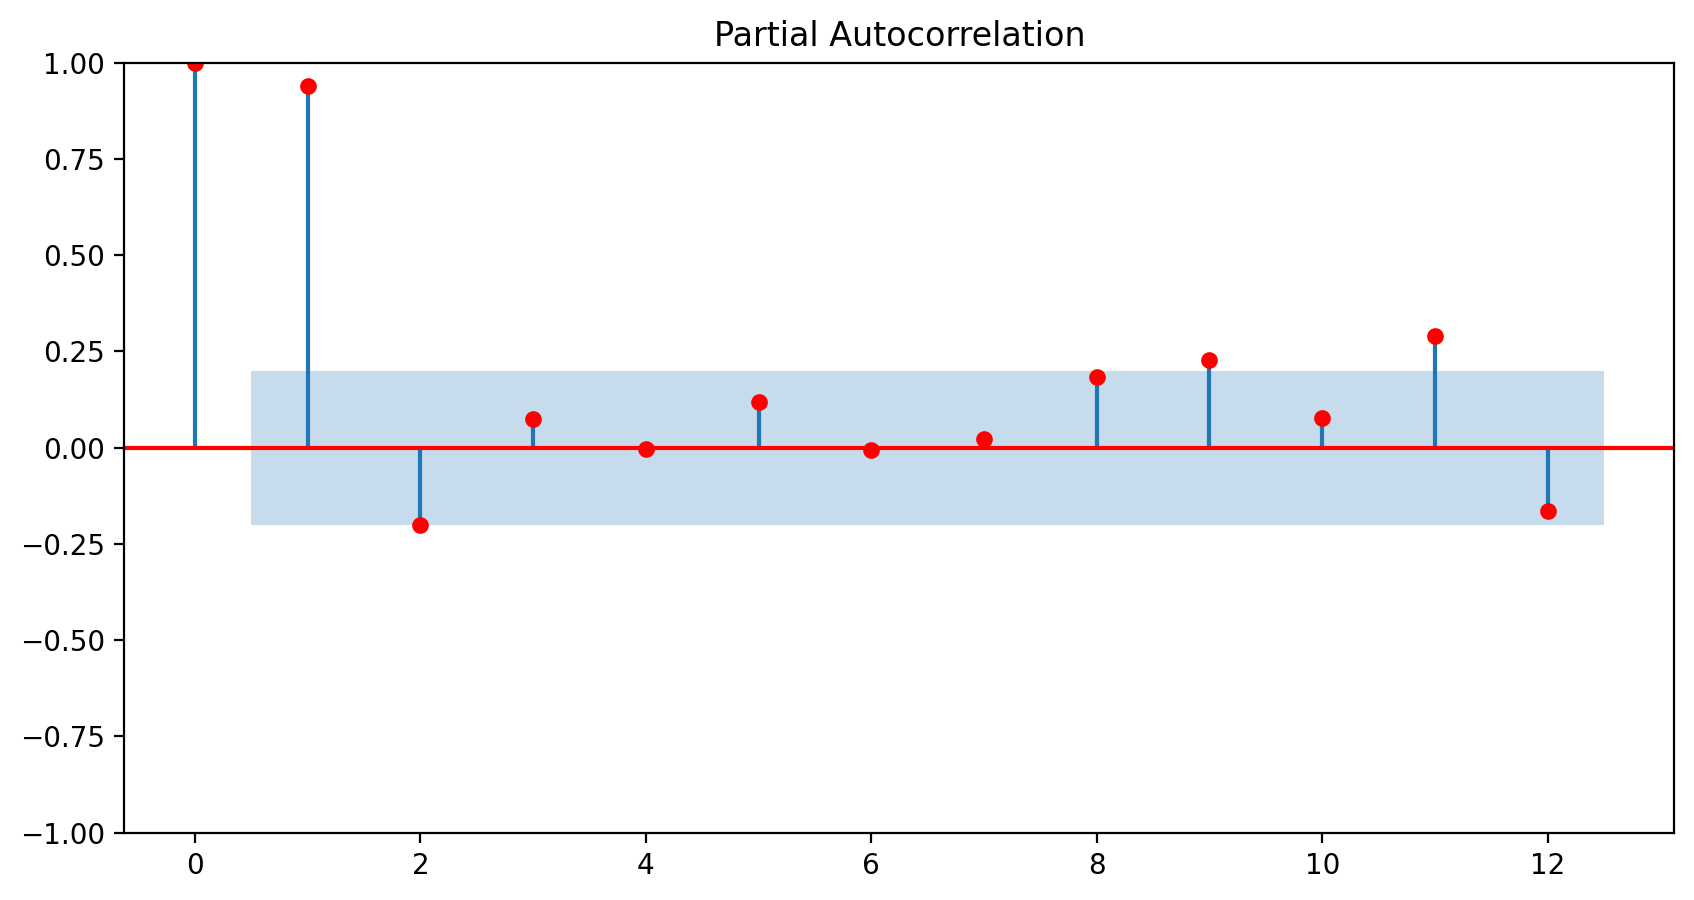

In [16]:
tsa_plots.plot_pacf(df.Passengers,lags=12,color='red')
plt.show()

In [17]:
# Creating a user defined function- to calculate the RMSE value
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

### Simple exponential method

In [18]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
r1=RMSE(pred_ses,test.Passengers) 
r1

80.54332901444145

### Holt's model

In [19]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
r2=RMSE(pred_hw,test.Passengers) 
r2

47.87772864030438

### Holts winter exponential smoothing with additive seasonality and additive trend


In [20]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
r3=RMSE(pred_hwe_add_add,test.Passengers) 
r3

35.906424630992824

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [21]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
r4=RMSE(pred_hwe_mul_add,test.Passengers)
r4

30.906583235206483

### Consolidating the results of all methods into a table

In [22]:
t={"model":pd.Series(['Simple exponential','Holts model','Holts-add seas,add trend','holts-mul sea,add trend']),
   "RMSE":[r1,r2,r3,r4]
  }

In [23]:
t=pd.DataFrame(t)
t

,model,RMSE
0,Simple exponential,80.543329
1,Holts model,47.877729
2,"Holts-add seas,add trend",35.906425
3,"holts-mul sea,add trend",30.906583


In [24]:
# Combining  train and test dataset for final model
finalmodel = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

### Forecasting for next 15 time periods

In [25]:
finalmodel.forecast(15)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
106    290.629755
107    330.595524
108    337.376594
109    332.122977
110    382.987983
dtype: float64

## Inference:
The model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model